In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import torch.nn as nn
from torch.optim import SGD
from helper import load_fashion_mnist_data, predict_fashion_mnist
from helper import evaluate_accuracy, evaluate_loss
from torch.utils.data import DataLoader
from MultiLayerPerceptron import MLP

In [46]:
# Input size: 28 (width) * 28 (height) = 784 pixels
num_inputs = 784

# Output size: 10 categories
num_outputs = 10

batch_size = 256
mnist_train, mnist_test = load_fashion_mnist_data(batch_size, resize=None)

In [47]:
class Reshape(nn.Module):
    def __init__(self, in_features: int):
        super(Reshape, self).__init__()
        self.in_features = in_features

    def forward(self, X):
        return X.view(-1, self.in_features)

In [48]:
rsp = Reshape(num_inputs)
fc1 = nn.Linear(num_inputs, 256)
relu = nn.ReLU()
fc2 = nn.Linear(256, num_outputs)

mlpNet = MLP(rsp, fc1, relu, fc2, verbose=True)
mlpNet.initialize()
mlpNet.train(mnist_train, 5)

[epoch 1, batch 46] loss: 1.4163070036017376
[epoch 1, batch 92] loss: 0.7912505735521731
[epoch 1, batch 138] loss: 0.6655512167059857
[epoch 1, batch 184] loss: 0.5784824989412142
[epoch 1, batch 230] loss: 0.538414280699647
[epoch 2, batch 46] loss: 0.5996774253637894
[epoch 2, batch 92] loss: 0.5044682317453882
[epoch 2, batch 138] loss: 0.4758323152428088
[epoch 2, batch 184] loss: 0.45601697330889496
[epoch 2, batch 230] loss: 0.45134968342988385
[epoch 3, batch 46] loss: 0.4862859987694284
[epoch 3, batch 92] loss: 0.42766266478144604
[epoch 3, batch 138] loss: 0.41557961248833203
[epoch 3, batch 184] loss: 0.4183893385140792
[epoch 3, batch 230] loss: 0.41098952552546625
[epoch 4, batch 46] loss: 0.44377072414626245
[epoch 4, batch 92] loss: 0.39667432398899743
[epoch 4, batch 138] loss: 0.3899273075487303
[epoch 4, batch 184] loss: 0.3959785511960154
[epoch 4, batch 230] loss: 0.37700618706319644
[epoch 5, batch 46] loss: 0.41004858716674475
[epoch 5, batch 92] loss: 0.3773104

MLP(
  (0): Reshape()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

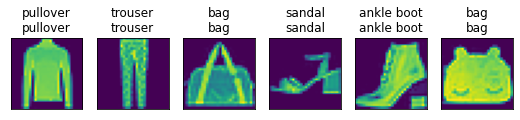

In [50]:
predict_fashion_mnist(mlpNet, mnist_test)

In [51]:
training_loss = evaluate_loss(mlpNet, mnist_train)
validation_loss = evaluate_loss(mlpNet, mnist_test)

print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Training Loss (60000 samples): 
0.3445357136408488
Validation Loss (10000 samples): 
0.3952591886043549


In [52]:
training_accuracy = evaluate_accuracy(mlpNet, mnist_train)
validation_accuracy = evaluate_accuracy(mlpNet, mnist_test)

print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Training accuracy (60000 samples): 
0.87355
Validation accuracy (10000 samples): 
0.8561
